# Aufgabenstellung

Für ein Heizsystem wird ein Glastubus verwendet. Durch eine regelbare Stromzufuhr wird Wärme generiert.
Je mehr Strom eingespeist wird, desto wärmer wird der Tubus.
Der Tubus gibt Wärme an seine Umgebung ab.
Die Menge der abgegebenen Wärme ist proportional zur Oberfläche des Tubus
und des Temperaturunterschiedes zwischen dem Tubus und der Umgebung.
Das Gleichgewicht des Temperatur-Verlustes und der Wärmeerzeugung lässt sich durch folgende Differentialgleichung ausdrücken:

\begin{align}
m\cdot c_P \frac{dT}{dt} &= Q \\
Q&=q_{in}-q_{out} \\
q_{in} &= q \\
q_{out} &=h_s \cdot A_s(T-T_a) 
\end{align}

Das Ziel ist es ein System zu entwerfen, welches die Temperatur des Glastubus regelt. Hierbei muss darauf geachtet werden, dass die Temperatur möglichst schnell den Zeilwert erreicht und das die Temperaturschwankungen auf ein Minimum reduziert werden.

# Aufgabe 1
In dieser Aufgabe soll die Differentialgleichung an einen Satz von Messdaten "gefittet" werden.
Hiebei sollen $m$ (Masse), sowie $A_s$ (Oberfläche), ermittelt werden.
Die Datei enthält Ergebnisse des Systems auf eine Sprungantwort. Die Werte der x-Achse sind die Zeitpunkte der Messungen in der Einheit Sekunde, startend bei 0 sek. Gemessen wurde die Temperaturdifferzenz zwischen dem Tubus und der Umgebung. Die Differenz wird in Kelvin angegenben und beträgt anfänglich 0 °K.

Die durch die Aufgabenstellung gegebene Differentialgleichung lässt sich explizit lösen:

$T(t)=k_1e^{-\frac{T_a h_s t}{c_p m}} + \frac{q}{T_a h_s}+T_a$

Die Wahl von $k_1$ nimmt einfluss auf den Startwert des Systems zum Zeitpunkt $t=0$. 


Da in der Aufgabenstellung nut die Absolute Temperatur des Tubus gegeben ist sondern die Temperaturdifferenz zwischen Tubus und Umgebung, wird $T-T_a$ als die Variable des Systems betrachtet. Dadurch ändert sich die Differentialgleichung wie folgt:

$T(t)=k_1e^{-\frac{A_s h_s t}{c_p m}} + \frac{q}{A_s h_s}$

Die Formel zeigt, dass die zu erreichende Temperaturdifferenz nicht von der Aussentemperatur abhängt. Dies bedeutet, dass beliebige Temperaturen erreicht werden können, welche in einem gewissen Bereich über der Aussentemperatur liegen, dessen obere Grenze durch die maximale Leistung des Heizelements gebenen ist (bei festen Eigenschaften des Tubus).

Für die Lösung der Differentialgleichung wurde $k_1$ so gewählt, dass zum Zeitpunkt $t=0$ die Temperaturdifferenz bei $0$ liegt.

$k_1= -(\frac{q}{A_s h_s})$


Da es sich um eine Sprungsantwort handelt wird die Heizleisztung $q$ als konstant angesehen. Ebenfalls wird die Umgebungstemperatur $T_a$ als konstant angesehen. Das heißt, dass die Außentemperatur nicht durch den Tubus beeinflusst wird, was nur bedingt der Realität entspricht. Würde dies berücksichtig werden, so würde das Modell wesentlich komplexer werden.

In [2]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import control as c

In [3]:
#einlesen der Messdaten

my_data = np.genfromtxt('measurement_data.csv', delimiter=';')
xdata = my_data[:,0]
time = xdata
ydata = my_data[:,1]

In [45]:
#definition der konstanten

hs = 5
q = 2000
Ta = 20
cp = 1078

In [56]:
#funktion zum fit 

def func(t, m, As):
    return ((-(q/(As*hs)))*np.e**(-(As*hs*t)/(cp*m))+q/(As*hs))

In [57]:
#bestimmen der lösung durch fit
# die hier verwendeten startwerte wurden durch grobe abschätzungen ermittelt
popt, pcov = curve_fit(func, xdata, ydata, p0=(10, 1), bounds=([0.1, 0.1],[30, 10]))

In [67]:
#ausgabe der ergebnisse

m = popt[0]
As = popt[1]

residuals = ydata - func(xdata, m, As)
fres = sum(np.abs(residuals))
print('fres: %6.2f ' % fres)
print('m: %6.2f' % m)
print('As: %6.2f' % As)

fres: 3917.39 
m:  17.90
As:   1.27


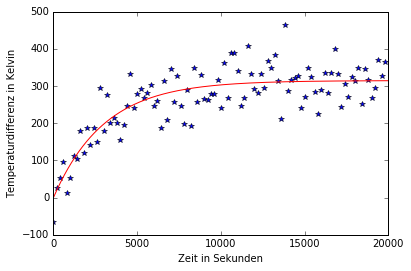

In [68]:
#plotten der ergebnisse

curvex = np.linspace(0,20000,10000)
curvey = func(curvex, m, As)

plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')
plt.xlabel("Zeit in Sekunden")
plt.ylabel("Temperaturdifferenz in Kelvin")

In [69]:
#finde grenzwert der gleichung durch optimierungsverfahren (umwandlung in minimierungsverfahren)
max_x = sc.optimize.fmin(lambda x: -func(x, m, As), 0)

Optimization terminated successfully.
         Current function value: -314.642845
         Iterations: 59
         Function evaluations: 147


# Auswertung
Die rote Kurve beschreibt die Temperaturdifferenz zwischen Tubus und Umgebung in Abhängigkeit zur Zeit, welche durch die Lösung der Differentialgleichung bei den gegebenen Konstanten bestimmt wurde. Die Werte für $m$ und $A_s$ wurden anhand der Messdaten gefittet ($m=13.42$ und $A_s=0.95)$.
Die Messdaten sind als blaue Sterne markiert. Es ist zu erkennen, dass die ermittelte Kurve gegen einen Grenzwert konvergiert ( $max_x = \tilde{}314.643$ ). Trotz starker Streuungen haben die Messdaten einen ähnlichen Verlauf und scheinen gegen den selben Wert zu laufen.

Der Tubus erwärmt sich solange, bis der Energieverlust zur Außenwelt ein Gleichgewicht mit der Leistung des Heizelementes bildet. Die Kurve weißt ein logarithmisches Wachstum auf. Anfangs ist die Temperaturzunahme maximal, läuft aber schnell in eine Sättigungsphase.

Mathemetisch Berechnung der Werte für Masse und Außenfläche:

$m = (\pi*r_{aussen}^2*h - \pi*r_{innen}^2*h)*Dichte = (1*\pi*0.11^2 - 1*\pi*0.1^2) *2500 = 16.4933$ 

$A_s = 2*\pi*r_{isolierung}*h =  2*\pi*0.2*1 = 1.2566$

Durch den Fit ermittelte Werte sind $13.42kg$ für die Masse und Aussenfläche $0.95m^2$ für die Aussenfläche. Der Wert für die Aussenfläche weicht um ca. 25% ab und die gefittete Masse um ca 20%. 

# vergleich überarbeiten wenn wert der eingangsspannung fest steht

In [10]:
m_math = (np.pi*0.11**2 - np.pi * 0.1**2) * 2500
print m_math
As_math = np.pi*0.2*2
print As_math

16.4933614313
1.25663706144


# Teil 2
Ab jetzt werden die mathematisch berechneten Werte für m und As eingesetzt. Für die Berechnung der maximal zu erreichenden Temperaturdifferenz, wird die maximale Leistung des Heizelements dem Temperaturverlust an die Umgebung gleichgesetzt. Dadurch wird der Punkt berechnet, bei dem sich die Wärmeenergie des Glastubus, bei konstanter Heizleistung, nicht mehr ändert.

$0 = q- h_sA_s(T-T_A)$

$T-T_a = q/(h_s A_s)$

Durch die gegebenen Werte für Masse und Aussenfläche des Tubus und einer Heizleistung von bis zu $2 kW$, ergibt sich eine maximal zu erreichende Temperaturdifferenz von 318.31 °K.

Durch genauerer Betrachtung der obrigen Formel lässt sich erkennen, dass sich die maximale Temperaturdifferenz linear zur anliegenden Leistung verhält. Dies bedeutet, dass bei doppelter Leistung auch eine doppelt so hohe Temperaturdifferenz erreicht werden kann.
                    


In [70]:
m = 16.49331431
As = 1.256637061

In [12]:
#formel entsteht durch gleichsetzung von qin und qout
def get_max_temp_delta(q):
    return q/(hs*As)

#bestimme maximale temperaturdifferenz bei 2kW und obrigen m und As
print(get_max_temp_delta(2000))

318.309886294


In [13]:
#rückgabewert ist temperaturdifferenz zu zeitpunkt t bei konstanter Leistung q -> sprungantwort
def step_response(t, q):
    return (-((q/(As*hs)))*np.e**(-(As*hs*t)/(cp*m))+q/(As*hs))

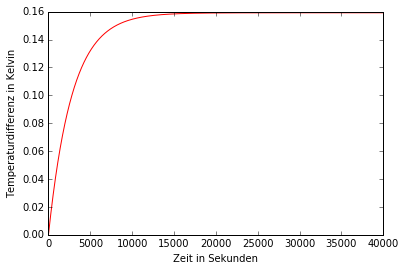

In [14]:
#plotten der unit_step_response
curvex_unit_step = np.linspace(0,40000,10000)
curvey_unit_step = step_response(curvex_unit_step, 1)

plt.plot(curvex_unit_step,curvey_unit_step,'r')
plt.xlabel("Zeit in Sekunden")
plt.ylabel("Temperaturdifferenz in Kelvin")

Der Plot zeigt die Temperaturdifferenz des Glastubus bei einem Sprung der Leistung von $0 W$ auf $1 W$.
Die Geschwindigkeit mit der die Temperatur ansteigt ist anfangs maximal und nimmt schnell ab. Die Kurve konvergiert gegen ~$0.16°K$. Die Hälfte ist bereits nach ca. 2500ek erreicht, wobei ein Wert von ca. 0.16 erst nach 17500sek zu erkennen ist.

Das System ist in dem Sinne linear, dass bei Doppelter Leistung sich auch eine doppelt so hohe Temperatur einstellt.

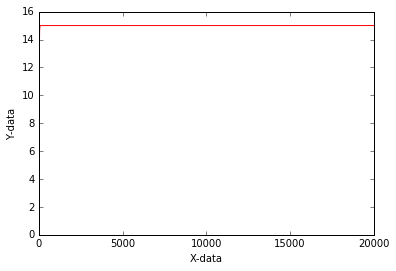

In [15]:
curvex= np.linspace(0,20000,1000)
curvey= func(curvex, 1, Ta)
plt.plot(curvex,curvey,'r')
plt.xlabel("X-data")
plt.ylabel("Y-data")

Das die Messadten im Negativen Bereich beginnen, sieht man in dem hier präsentierten Graphen. Die Temperatur steigt nimmt in den ersten 5000 Sekunden um 12 Grad zu, jedoch stellt sich die Endtemperatur erst nach ca 13000 Sekunden, bei 0 Grad ein. 

In [16]:
f = 1000000
#IST DAS SCHUMMELEI? MÖGLICH...
def u(t, f):
    return 1000*np.sin(np.pi*((f*2*t)%2))

In [17]:
for t in range(10):
    print(t, u(t/2, f))
#stelle diese Aufgabe zurück, frage mal nach: ist immer 0 gewollt? was für ein Offset?

(0, 0.0)
(1, 0.0)
(2, 0.0)
(3, 0.0)
(4, 0.0)
(5, 0.0)
(6, 0.0)
(7, 0.0)
(8, 0.0)
(9, 0.0)


179.154943147


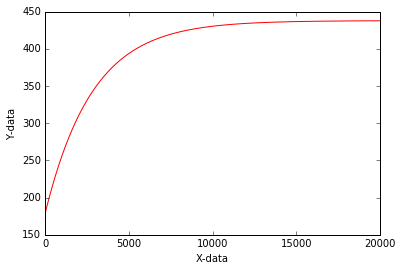

In [18]:
# simuliere constante von 1kW -> berechne erzielte Temperatur bei 1kW leistung
p_max = 1000
T_1kW = p_max/(hs*As)+Ta
print(T_1kW)

# Funktion der Temperatur, welche bei der einer Temperatur anfängt, welche bei einer Leistung von 1kW entsteht
def func_with_pre_temp(t, q, T_pre):
    return (-(q/(As*hs)+Ta)*np.e**(-(As*hs*t)/(1078*m))+q/(As*hs)+Ta)+T_pre

curvex= np.linspace(0,20000,10000)
curvey= func_with_pre_temp(curvex, q, T_1kW)
plt.plot(curvex,curvey,'r')
plt.xlabel("X-data")
plt.ylabel("Y-data")

In [71]:
def func_1(t, q, start_temp):
    return (-((q/(As*hs)+Ta)-start_temp)*np.e**(-(As*hs*t)/(1078*m))+q/(As*hs)+Ta)
    
q = 1000
time_offset = 0
start_temp = 0
curvex = np.arange(0, 300*60, 0.5)
curvey = np.arange(0, 300*60, 0.5)


m = 16.49
As = 1.256
Ta = 7.11

for i in range(len(curvex)):
    if(curvex[i] == 1800):
        q = 2000
        time_offset = 1800
        start_temp = curvey[i-1]
    curvey[i] = func_1(curvex[i]-time_offset, q, start_temp)

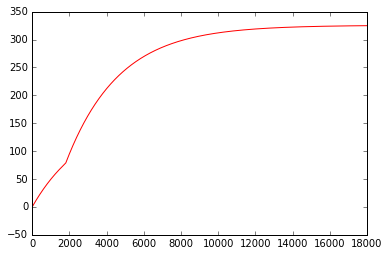

In [72]:
plt.plot(curvex, curvey, 'r')

In [73]:
print(curvey[4000])


95.1293364289


In [74]:
curvex_3 = np.arange(0, 250*60, 0.5)
curvey_3 = np.arange(0, 250*60, 0.5)

start_temp = 0
for i in range(len(curvex_3)):
    q = 1000+(np.random.rand(1)-0.5)*1000
    curvey_3[i] = func_1(0.5, q, start_temp)
    start_temp =  curvey_3[i]

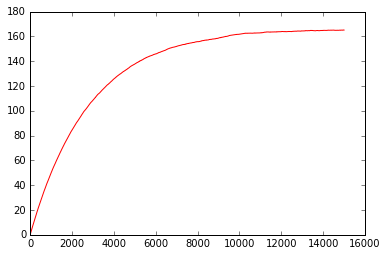

In [75]:
plt.plot(curvex_3, curvey_3, 'r')

In [76]:
#charakteristische Formal für das PT1 Verhalten
def func(x, K, T):
     return K*(1 - np.e**(-x/T))

In [227]:
#Kooeffizientenvergleich liefert werte für T und K
q = 2000
q_max = 2000
T = cp*m/(As*hs)
K = q/(As*hs)/q
print ("K=" +str(K))
print ("T=" + str(T))

K=0.15923566879
T=2830.60828025


In [228]:
#transferfunktion von PT1
sys = c.tf([K],[T,1])
sys



  0.1592
----------
2831 s + 1

stable amplitude = 18.0313433724
stable mean = 159.013124139


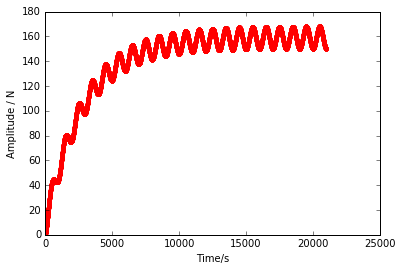

In [229]:
#lege sinusfunktion an wie in aufgabe beschrieben
time = np.arange(0,350*60,0.5)

# timespan: zeitspanne des experiments in sekunden: 600[sek]
# delta_t: zeitdelte der auswertungen, auswertung alle 0.5[sek]
# frequence: frequenz mit der die sinusschwingung beeinflusst
def create_input(timespan, delta_t, frequence):
    array = np.zeros(np.int(timespan/delta_t))
    time = 0
    i = 0
    while time < timespan:
        # variante 1: rechne leistung um, da das k auf basis 2000W bestimmt wurde (sodass 2000W == 1)
        #array[i] = 0.5*np.sin(2*np.pi*frequence*time) + 0.5
        # variente 2: setze k = k/2000 (aktive)
        array[i] = (1000*np.sin(2*np.pi*frequence*time) + 1000)
        i = i+1
        time = time + delta_t
    return array
        
input = create_input(350*60, 0.5, 0.001)      
output, time_out, xout =  c.lsim(sys,input,time)
plt.plot(time_out,output,'r.')
#plt.plot(time,input,'b')
plt.xlabel('Time/s')
plt.ylabel('Amplitude / N')
stable_max = np.max(output[35000:])
stable_min = np.min(output[35000:])
stable_mean = np.mean(output[35000:])

print ("stable amplitude = " +str(stable_max-stable_min))
print ("stable mean = " +str(stable_mean))

Die Grafik Zeigt die Antwort des Systems auf eine wie in der Aufgabe beschriebene Sinusschwingung des Eingangssignals.
Die Sinusschwingung des Eingangssignals lässt sich eindeutig im Plot erkennen. Schon nach einer Zeit von ca. 13000 ekunden lässt sich eine konstante Schwingung erkennen.Diese Schwingung hat eine Amplitude von ca. 18°K und eine schwingt um einen Wert ca. 159 °K.

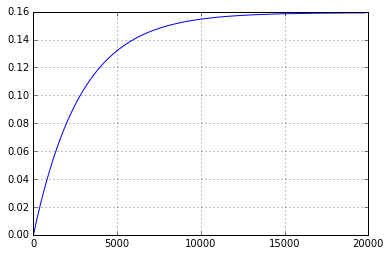

In [126]:
# ist mit unit step responce sprung aus maximalleistung 2kW gemeint oder auf 1W?
# hier -> 1W  da das k skaliert wurde
step_data = c.step_response(sys)
plt.plot(step_data[0],step_data[1])
plt.grid()

# hier muss noch die grafik beschrieben werden


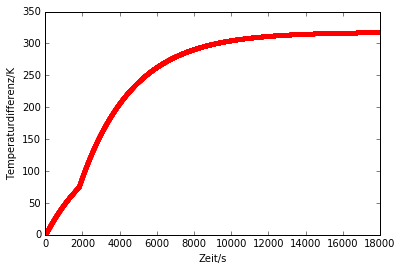

In [128]:
time = np.arange(0,300*60,0.5)
input = np.zeros(len(time))+1000
for i, val in enumerate(time):
    if (val > 30*60): input[i] = 2000
        
output, time_out, xout =  c.lsim(sys,input,time)
plt.plot(time_out,output,'r.')
plt.xlabel('Zeit/s')
plt.ylabel('Temperaturdifferenz/K')

Der Plot zeigt die geringer werdende Temperaturzunahme bis zu $t=1800$. Der Sprung von 1kW auf 2kW ist deutlich zu erkennen, in Form der plötzlichen Zunahme der Temperatursteigung.

30000


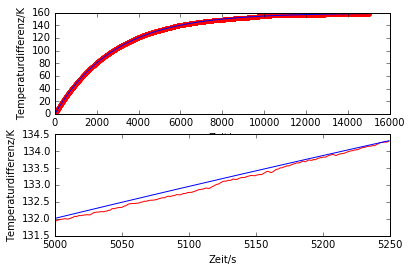

In [207]:
time = np.arange(0,250*60,0.5)
stable_input = np.zeros(len(time))+1000
noise_input = (np.random.rand(len(time))-0.5)*1000
input = stable_input + noise_input
output, time_out, xout =  c.lsim(sys,input,time)
output_stable, time_out_stable, xout_stable =  c.lsim(sys,stable_input,time)

plt.subplot(2, 1, 1)
plt.plot(time_out,output,'r.')
plt.plot(time_out,output_stable,'b')
plt.xlabel('Zeit/s')
plt.ylabel('Temperaturdifferenz/K')

plt.subplot(2, 1, 2)
start_time = 10000
end_time = 10500
plt.plot(time_out[start_time:end_time],output[start_time:end_time],'r')
plt.plot(time_out[start_time:end_time],output_stable[start_time:end_time],'b')
plt.xlabel('Zeit/s')
plt.ylabel('Temperaturdifferenz/K')
plt.show()

Die rote Kurve der obrigen Grafik zeigt die Reaktion des Systems auf ein eingangssignal von 1kW mit einer gleichverteilten Störung von 500W. Die blaue Kurve selbiges System, ohne Störung. In dem hier gezeigten Ausschnitt ist die Störung kaum bis gar nicht zu erkennen, lediglich die mittlere Leistung von 1kW ist erkennbar durch den algemeinen Trend der Kurve. Beide Kurven haben keine deutlichen Abweichungen voneinander.

Bei Betrachtung eines kleinen Zeitintervalls der beiden Kurven, ist der Effekt des Störsignals bei der roten Kurve deutlich zu erkennen. Zu anfangs wirken sich die Leistungsschwankungne noch nicht so deutlich auf die Gradlinigkeit der Kurve aus, was sich im späteren verlauf jedoch ändert, da der Temperaturverlust durch die Wärmeabgabe an die Umgebung einen stärkeren Einfluss erhält. Die Abweichungen zur blauen sind gut bei entsprechend genauer Betrachtung gut zu erkennen, jedoch ist die Differenz der beiden Kurven

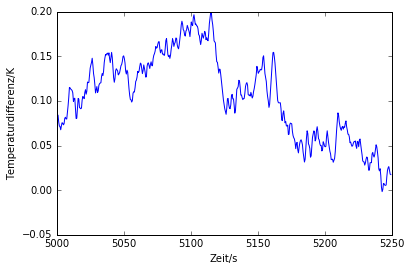

In [208]:
plt.plot(time_out[start_time:end_time],output_stable[start_time:end_time]-output[start_time:end_time],'b')
plt.xlabel('Zeit/s')
plt.ylabel('Temperaturdifferenz/K')

17776.22

   2831
----------
2831 s + 1



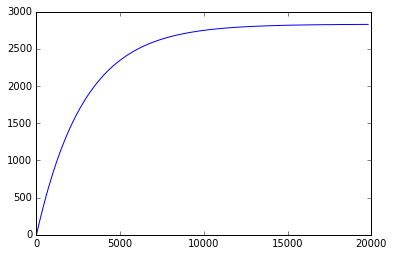

In [262]:
Gs = sys
Tt = 1
Kp = 1/K*T/Tt
print(Kp)
P = c.tf([Kp],[1])
Gr = P
Go = Gr*Gs
print Go

[yout, time] = c.step(Go)
plt.plot(time, yout)

In [260]:
Tt = 1
Kp = 0.9/K*T/Tt
Ti = 3.33*Tt

P = c.tf([Kp],[1])
I = c.tf([1], [Ti, 0])
PI = P + I
Go = PI*sys
PI

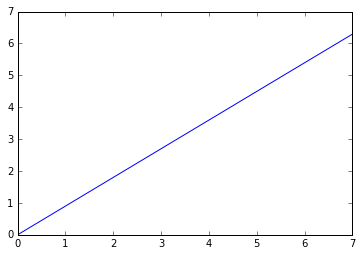

In [261]:
[yout, time] = c.step(Go)
plt.plot(time, yout)